In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'models_20251114-205441'
df = pd.read_csv(f"{folder_path}/losses.csv")
df.head()

,Unnamed: 0,Iterations,Total Loss,Learning Rate
0,0,0,17226.759766,0.001
1,1,1,16317.050781,0.001
2,2,2,14839.459961,0.001
3,3,3,13592.413086,0.001
4,4,4,14708.942383,0.001


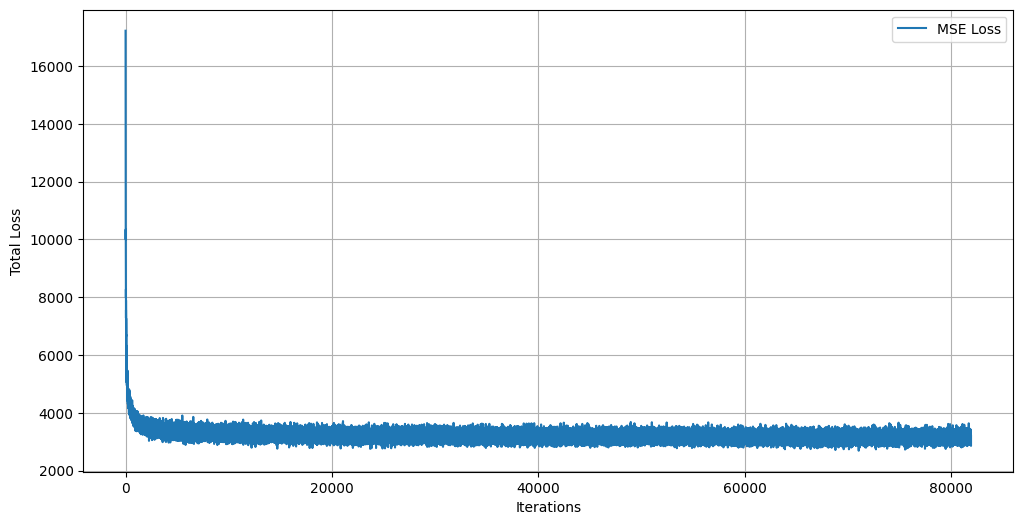

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='Iterations', y='Total Loss', label='MSE Loss')
plt.grid()
plt.show()

![](./models_20251114-205441/vae_image_grid_150.png)

![](models_20251114-205441/latent_space_tsne.png)

In [7]:
import mlx.core as mx
import mlx.nn as nn

class Decoder(nn.Module):
    def __init__(self, latent_dim: int):
        super().__init__()
        self.fc = nn.Linear(input_dims=latent_dim, output_dims=7 * 7 * 64)
        self.conv1 = nn.ConvTranspose2d(
            in_channels=64,
            out_channels=64,
            kernel_size=3,
            stride=2,
            padding=1,
            output_padding=1,
        )
        self.conv2 = nn.ConvTranspose2d(
            in_channels=64,
            out_channels=32,
            kernel_size=3,
            stride=2,
            padding=1,
            output_padding=1,
        )
        self.output = nn.ConvTranspose2d(
            in_channels=32,
            out_channels=1,
            kernel_size=3,
            padding=1,
        )

    def __call__(self, x) -> mx.array:
        batch_size = x.shape[0]
        x = nn.relu(self.fc(x))
        x = mx.reshape(x, [batch_size, 7, 7, 64])
        x = nn.relu(self.conv1(x))
        x = nn.relu(self.conv2(x))
        x = nn.sigmoid(self.output(x))
        return x
    
decoder = Decoder(12)
decoder.load_weights(f"{folder_path}/decoder_weights_145.safetensors")

Decoder(
  (fc): Linear(input_dims=12, output_dims=3136, bias=True)
  (conv1): ConvTranspose2d(64, 64, kernel_size=(3,), stride=(2, 2), padding=(1, 1), dilation=1, output_padding=(1, 1), bias=True)
  (conv2): ConvTranspose2d(64, 32, kernel_size=(3,), stride=(2, 2), padding=(1, 1), dilation=1, output_padding=(1, 1), bias=True)
  (output): ConvTranspose2d(32, 1, kernel_size=(3,), stride=(1, 1), padding=(1, 1), dilation=1, output_padding=(0, 0), bias=True)
)

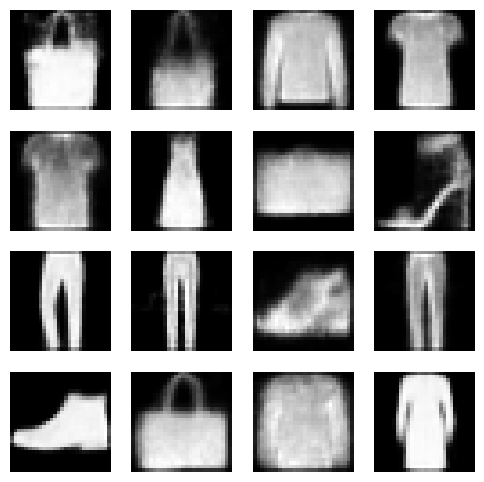

In [10]:
sample_count = 16
z = mx.random.normal((16, 12))
images = decoder(z)
plt.figure(figsize=(6, 6))
for i in range(sample_count):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
plt.show()